In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
%matplotlib inline

In [152]:
dividend_df = pd.read_csv('logs/dividend_log.txt', header=None)
dividend_df = pd.DataFrame(dividend_df[0].str.split().tolist()).astype(int)
dividend_df.columns = ['return_value', 'dividend_size', 'divisor_size', 'runtime']
dividend_df

,return_value,dividend_size,divisor_size,runtime
0,1,10,10,0
1,1,12,10,0
2,1,12,10,0
3,1,13,10,0
4,1,15,10,0
...,...,...,...,...
9985,1,9995,10,18
9986,1,9997,10,18
9987,1,9998,10,18
9988,1,9999,10,19


In [153]:
def predict(poly, data, order=2): 
    return sum([poly[i]*(data**(2 - i)) for i in range(len(poly) - 1)]) + poly[-1]

In [154]:
fit = np.polyfit(dividend_df['dividend_size'], dividend_df['runtime'], 2)
order_map = dict(zip(fit, reversed(list(range(len(fit))))))
order_map = {round(term, 5): order for term, order in order_map.items()}
order_map = {k: v for k, v in order_map.items() if abs(k) > 0}
print(' + '.join(f'{term}{f"x^{order}" if order != 0 else ""}' for term, order in order_map.items()))

0.00189x^1 + -0.38735


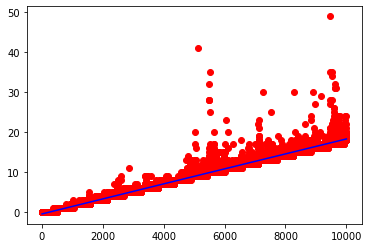

In [155]:
dividend_df['regression'] = dividend_df['dividend_size'].map(lambda x: predict(fit, x)).tolist()
plt.scatter(dividend_df['dividend_size'], dividend_df['runtime'], color='red')
plt.plot(dividend_df['dividend_size'], dividend_df['regression'], color='blue')

<ipython-input-156-69cd2f3aa961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dividend_dist['pct_err'] = 100*(dividend_df['runtime'] - dividend_df['regression'])/dividend_df['regression']


(array([2.900e+01, 3.100e+01, 3.600e+01, 5.200e+01, 7.100e+01, 1.550e+02,
        3.040e+02, 9.910e+02, 2.512e+03, 2.476e+03, 1.262e+03, 4.940e+02,
        2.930e+02, 2.050e+02, 1.300e+02, 8.600e+01, 6.700e+01, 5.100e+01,
        3.000e+01, 3.900e+01, 2.500e+01, 2.500e+01, 1.700e+01, 1.100e+01,
        1.600e+01, 1.900e+01, 1.000e+01, 8.000e+00, 1.000e+01, 1.300e+01,
        1.000e+01, 9.000e+00, 4.000e+00, 0.000e+00, 5.000e+00, 6.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

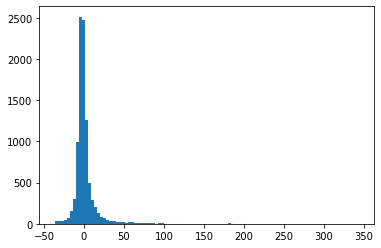

In [156]:
dividend_dist = dividend_df.loc[dividend_df['runtime'] != 0]
dividend_dist['pct_err'] = 100*(dividend_df['runtime'] - dividend_df['regression'])/dividend_df['regression']
plt.hist(dividend_dist['pct_err'], bins=100)

In [157]:
kurtosis(dividend_dist['pct_err'])

70.66361836124753

In [158]:
divisor_df = pd.read_csv('logs/divisor_log.txt', header=None)
divisor_df = pd.DataFrame(divisor_df[0].str.split().tolist()).astype(int)
divisor_df.columns = ['return_value', 'dividend_size', 'divisor_size', 'runtime']
divisor_df

,return_value,dividend_size,divisor_size,runtime
0,1,10000,2,6
1,1,10000,3,7
2,1,10000,4,9
3,1,10000,5,10
4,1,10000,6,12
...,...,...,...,...
9994,1,10000,9996,92
9995,1,10000,9997,92
9996,1,10000,9998,89
9997,1,10000,9999,89


In [159]:
fit = np.polyfit(divisor_df['divisor_size'], divisor_df['runtime'], 2)
order_map = dict(zip(fit, reversed(list(range(len(fit))))))
order_map = {round(term, 5): order for term, order in order_map.items()}
order_map = {k: v for k, v in order_map.items() if abs(k) > 0}
print(' + '.join(f'{term}{f"x^{order}" if order != 0 else ""}' for term, order in order_map.items()))

-0.00015x^2 + 1.54136x^1 + -11.27207


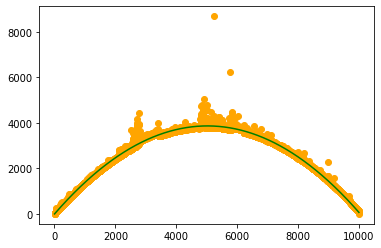

In [160]:
divisor_df['regression'] = divisor_df['divisor_size'].map(lambda x: predict(fit, x)).tolist()
plt.scatter(divisor_df['divisor_size'], divisor_df['runtime'], color='orange')
plt.plot(divisor_df['divisor_size'], divisor_df['regression'], color='green')

<ipython-input-161-2109d807a33a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divisor_dist['pct_err'] = 100*(divisor_dist['runtime'] - divisor_dist['regression'])/divisor_dist['regression']


(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00, 2.00e+00, 0.00e+00, 9.89e+03, 9.10e+01, 5.00e+00,
        2.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([-2752.78850115, -2671.13434489, -2589.48018863, -2507.82603236,
        -2426.1718761 , -2344.51771984, -2262.86356357, -2181.20940731,
        -2099.55525105, -2017.90109478, -1936.24693852, -1854.59278226,
        -1772.93862599, -1691.28446973, -1609.63031347, -1527.97615721,
        -1446.32200094, -1364.66784468, -1283.01368842, -1201.35953215,
        -1119.70537589, -1038.05121963,  -956.39706336,  -874.7429

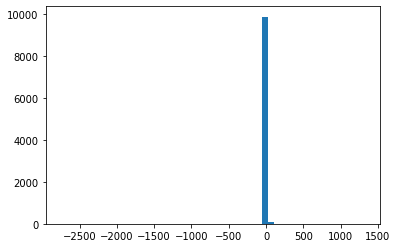

In [161]:
divisor_dist = divisor_df.loc[divisor_df['runtime'] != 0]
divisor_dist['pct_err'] = 100*(divisor_dist['runtime'] - divisor_dist['regression'])/divisor_dist['regression']
plt.hist(divisor_dist['pct_err'], bins=50)

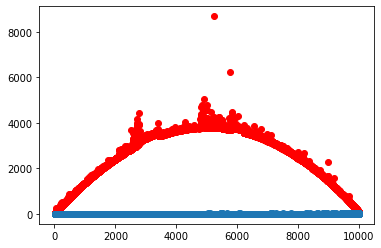

In [163]:
plt.scatter(divisor_df['divisor_size'], divisor_df['runtime'], color='red')
plt.scatter(dividend_df['dividend_size'], dividend_df['runtime'])
# plt.plot(dividend_df['dividend_size'], /divisor_df['regression'], color='green')
